<a href="https://colab.research.google.com/github/xuhu357/DataAnalysis/blob/master/ch08_%EB%8F%84%EC%8B%9D%ED%99%94_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## matplot lib을 이용한 시각화

8.1.1 Figure와 subplot

matplotlib에서 그래프는 Figure 객체 내에 존재.
그래프를 위한 새로운 Figure는 plt.figure를 통해서 생성가능.

Options:
* figsize: 그래프가 디스크에 저장될 경우의 크기나 가로-세로 비율을 조정.
* 현재 활성화된 Figure에 대한 참조는 plt.gcf()

빈 Figure 객체로는 그래프를 만들수 없으므로 최소 하나의 subplot을 생성해야 함.

In [0]:
import matplotlib.pyplot as plt

In [2]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [0]:
ax1 = fig.add_subplot(2, 2, 1) # fig 객체의 크기가 2 x 2 이고 4개의 sub plot중 첫번째를 선택하겠다는 의미.

In [0]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [0]:
from numpy.random import randn
import numpy as np

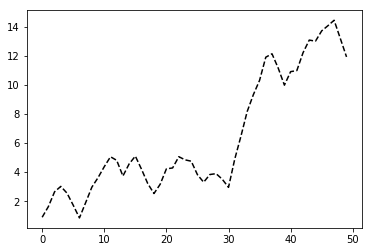

In [6]:
plt.plot(randn(50).cumsum(), 'k--')

In [0]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)

In [8]:
ax2.scatter(np.arange(30), np.arange(30)+3*randn(30))

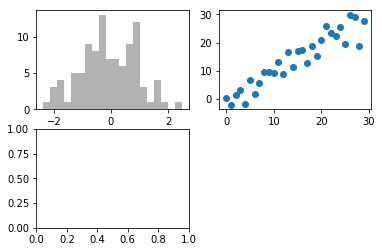

In [9]:
fig

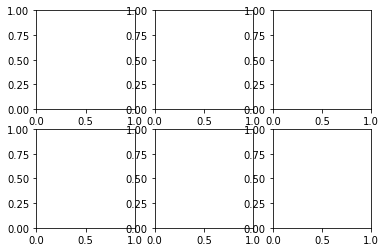

In [12]:
fig, axes = plt.subplots(2, 3)

pyplot.subplots의 옵션

* nrows: 서브플롯의 로우수
* ncols: 서브플롯의 칼럼수
* sharex: 모든 서브플롯이 같은 x축 눈금을 사용하도록 한다. (xlim 값을 조절하면, 모든 subplot에 적용)
* sharey: 모든 서브플롯이 같은 y축 눈금을 사용하도록 한다. 
* subplot_kw: add_subplot()을 사용해서 각 서브플롯을 생성할 때, 사용할 키워드를 담고 있는 사전.
* **fig_kw: Figure를 생성할 때, 사용할 추가적인 키워드 인자. (ex, plt.subplots(2, 2, figuresize=(8,6)))

### subplot간 간격 조절하기

서브플롯간의 간격은 Figure의 subplots_adjust메소드를 사용해서 쉽게 바꿀 수 있다. 

subplots_adjust함수는 최상위 함수로도 존재.


In [13]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

<Figure size 432x288 with 0 Axes>

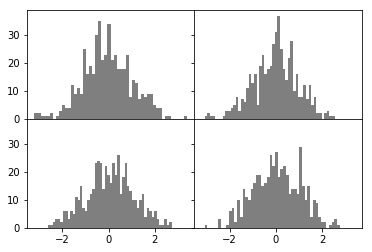

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
  for j in range(2):
    axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 8.1.2 색상, 마커, 선 스타일

matplotlib에서 가장 중요한 plot 함수는 x와 y좌표 값이 담긴 배열과 추가적으로 색상과 선 스타일을 나타내는 축약 문자열을 인자로 받는다. 

ax.plot(x, y, 'g--')

ax.plot(x, y, linestyle='--', color='g')

이런 형식으로 표현 가능

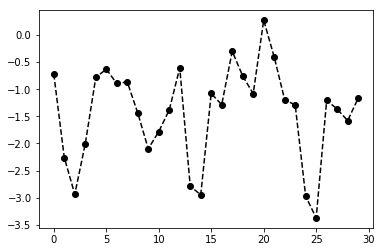

In [16]:
plt.plot(randn(30).cumsum(), 'ko--')

좀더 명시적으로 표현하면, 

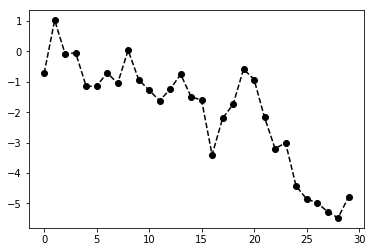

In [17]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

선 그래프를 보면, 일정한 간격으로 연속된 지점이 연결되어 있는데, 이역시 drawstyle 옵션을 이용해서 바꿀수 있다. 

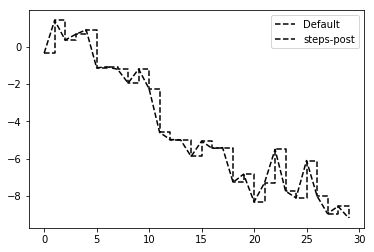

In [22]:
data = randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### 8.1.3 눈금 라벨, 범례

그래프를 꾸미는 방법 2가지
* pyplot interface 을 사용해서 순차적으로 꾸미던가
* matplotlib api를 이용해서 좀더 객체지향적으로 꾸미는 방법.

pyplot 인터페이스는 interactive사용에 맞추어 설계 되었고, xlim, xticks, xticklabels 같은 메소드로 이루어 졌다. 

* 아무런 인자도 없이 호출하면, 현재 설정되어 있는 매개변수의 값을 반환. plt.xlim()메소드는 현재 x축의 범위를 반환.
* 인자를 전달하면, 매개변수의 값을 설정. 그래서 plt.xlim([0, 10])을 호출하면, X축의 범위가 0부터 10까지로 설정.


---

이 모든 메소드는 현재 활성화된, 혹은 가장 최근에 생성된 AxesSubplot 객체에 대해 동작한다.

앞서 소개한 모든 메소드는 subplot객체의 set/get 메소드로 존재하는데, xlim이라면, ax.get_xlim과 ax.set_xlim메소드 존재. 

#### 제목, 축일므, 눈금, 눈금 이름 설정하기.

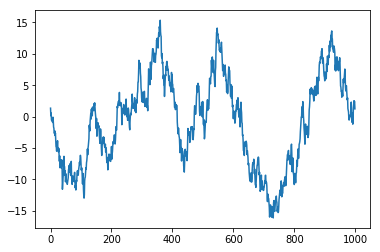

In [27]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(1000).cumsum())


In [0]:
# X축의 눈금을 변경하기 위한 가장 쉬운 방법은 set_xticks와 set_xticklabels를 사용하는것이다. 

ticks = ax.set_xticks([0, 250, 500, 750, 1000])

labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [29]:
ax.set_title('My First mapplotlib plot')

Text(0.5, 1.0, 'My First mapplotlib plot')

In [30]:
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

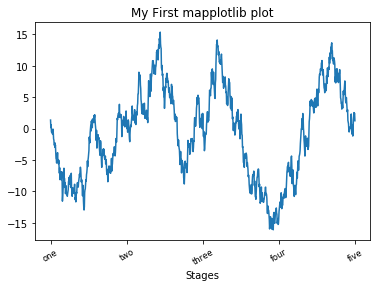

In [31]:
fig

### 범례 추가하기.

범례는 그래프의 요소를 확인하기 위한 중요한 요소.

범례를 추가하는 가장 쉬운 방법은 각 그래프에 label 인자를 넘기는 것이다.


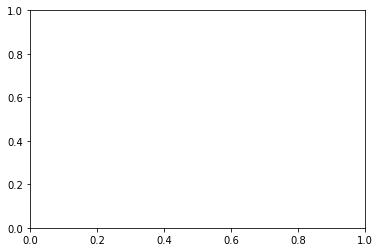

In [32]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [33]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

ax.plot(randn(1000).cumsum(), 'k--', label= 'two')

ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

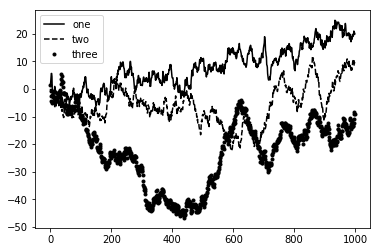

In [34]:
fig

### 8.1.4 주석과 그림 추가

일반적인 도표에 추가적으로 글자나, 화살표 혹은 다른 도형으로 자기마느이 주석을 그리고 싶을때가 있다. 주석과 글자는 text, arrow, annotate 함수를 사용해서 추가 가능. 

text 함수는 도표내의 주어진 좌표(x, y)에 부가적인 스타일의 글자를 그려준다.

In [0]:
# ax.text(x, y, 'Hello, World', family='monospance', fontsize=10)

주석은 글자와 화살표를 함께 써서 그릴 수 있는데, 예제로 야후 파이낸스에서 얻은 2007년 부터 s&p 500 지수 데이터로 그래프를 생성하고 2008~2009 년 사이에 있었던 재저위기 중 중요한 날짜를 주석으로 추가해보자.

In [36]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spx.csv to spx.csv
User uploaded file "spx.csv" with length 150105 bytes


In [0]:
from datetime import datetime
import pandas as pd
import numpy as np

Text(0.5, 1.0, 'Important dates in 2008-2009 financial crisis')

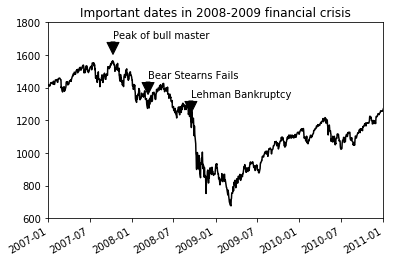

In [40]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

data= pd.read_csv('spx.csv', index_col=0, parse_dates=True)

spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull master'), 
    (datetime(2008, 3, 12), 'Bear Stearns Fails'), 
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
  ax.annotate(label, xy=(date, spx.asof(date)+50),
              xytext=(date, spx.asof(date)+200),
              arrowprops=dict(facecolor='black'),
              horizontalalignment='left', verticalalignment='top'
             )
  
ax.set_xlim(['1,1/2007', '1/1/2011'])
ax.set_ylim([600,1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

도표에 도형을 추가하려면, patches 객체인 shp를 만들어서 서브플롯에 ax.add_patch(shp)를 호출하여 추가할 수 있다.

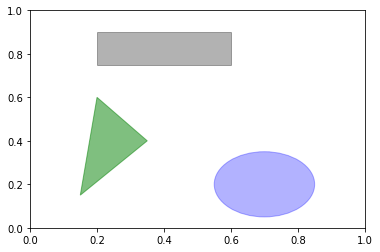

In [41]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

잘 그려진 여러가지 도표를 잘 살펴보면, 다양한 patches 를 잘 조합했음을 알 수 있다.

### 8.1.5 그래프를 파일로 저장

활성화된 Figure는 plt.savefig메소드를 이용해서 파일로 저장할 수 있다. 

plt.savefig('figpath.svg')

In [42]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [43]:
!ls

figpath.png  sample_data  spx.csv


savefig 메소드는 파일에 저장할 수 있을 뿐만아니라, StringIO같은 파일과 유사한 객체애도 저장할 수 있다. 

In [44]:
from io import BytesIO

buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

Figure의 savefig옵션

* fname: 파일 이름
* dpi: 해상도, 기본값은 100
* facecolor, edge color: 서브플롯 바깥 배경 색상, 기본 값은 흰색
* format: 명시적인 파일 포맷
* bbox_inches: Figure에서 저장할 부분, 만약에 'tight'이면, Figure 둘레의 비어 있는 공간을 모두 제거.

### 8.1.6 matplotlib 설정

matpotlib은 출판물용 도표를 만드는데 손색이 없는 기본 설정과 색상 스키마를 함께 제공.

matplotlib 의 환경 설정 시스템은 두가지 방법으로 다룰수 있는데, 첫번째는 rc 메소드를 사용해서 프로그래밍적으로 설정.

예를 들어 10x10으로 크기를 전역으로 설정하고 싶다면, 

In [0]:
# plt.rc('figure', figsize=(10, 10))

rc 메소드의 첫번째 인자는 설정하고자 하는 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend' 및 다른 컴포넌트이름이다.


dictionary방식으로 사용가능

In [0]:
font_options = {
    'family': 'monospace',
    'weight': 'bold',
    'size': 'small'
}

# plt.rc('font', **font_options)

2019.5.6일